# **Heteroscedasticity**

## Definition

Let $\epsilon_1, \epsilon_2, \ldots, \epsilon_n$ a sequence of random variables where variance of each term is $Var(\epsilon_i) = \sigma_i^2$

if $\sigma_i^2 \neq \sigma_j^2$ for *some* $(i, j) : i \neq j$ we say this sequence of random variables does not have constant variance and therefore the sequence is **heteroscedastic**.

## Description

In an OLS regression model where

$Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$ for $i = 0, 1, \ldots, n$

we assume the error terms $\epsilon_1, \epsilon_2, \ldots, \epsilon_n$ are iid and normally distributed with a mean of 0 and have constant variance, $\epsilon_i$ ~ $N(0, \sigma^2)$ for all $i$

If the assumption is true, then we say this sequence of error terms are **homoscedastic**. However, if the empirical data shows us that the variance of error terms are **not** constant, then we decide the sequence is **heteroscedastic**.

## Demonstration and Diagram

In [73]:
# Define our functions to create simulated values

import random
import matplotlib.pyplot as plt

def genHetEpsilon(f, x):
    """Generates a normally distributed error term with mean 0 and variance a function of x,
    var(epsilon) = f(x)

    Args:
        f (function): a function to be applied on x
        x (float): represents an observation of a predictor variable X
    """
    var = f(x)
    return random.normalvariate(0, f(x)**0.5)

x_arr = [random.uniform(0, 50) for i in range(100)]

def genyValues(x_arr, f, beta_0, beta_1):
    """Generates y values as a linear function of x values 
    from x_arr with heteroscedastic error terms.
    
    y = beta_0 + beta_1 * x + epsilon

    Args:
        x_arr (list): a list of values, representing draws from a predictor variable X
        f (function): a function to be applied on x to generate variance of error terms
        beta_0 (float): intercept coefficient
        beta_1 (float): slope coefficient
    """
    return [beta_0 + beta_1*x + genHetEpsilon(f, x) for x in x_arr]

def plotOLS(x_arr):
    """Create a scatterplot of x_arr and fitted values

    Args:
        x_arr (list): an array of numbers
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x_arr, genyValues(x_arr, lambda x: x**2, 10, 1), label=r"$(x_i, y_i): y_i = \beta_0 + \beta_1 x_i + \epsilon_i$")
    ax.set(title="OLS Scatterplot with Heteroscedasticity")
    ax.set_xlabel(r"$x_i$", fontsize=16)
    ax.set_ylabel(r"$y_i$", fontsize=16)
    ax.legend()
    return fig, ax

(<Figure size 720x432 with 1 Axes>,
 <Axes: title={'center': 'OLS Scatterplot with Heteroscedasticity'}, xlabel='$x_i$', ylabel='$y_i$'>)

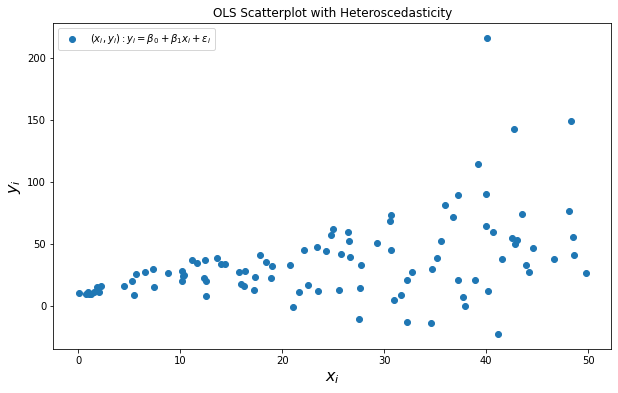

In [75]:
# Generate an array of uniform draws between 0 and 50, of length 100 to simulate data
x_arr = [random.uniform(0, 50) for i in range(100)]

# Plot our values
plotOLS(x_arr)

As we can see, because we defined the variance of error terms as $Var(\epsilon_i) = x_i^2$, our data has **heteroscedasticity**, showing increasing $y_i$ variance with increasing $x_i$ values.